In [1]:
# 사용 상의 편의를 위한 Initial Setting 

# 실행결과를 한 창에 표시
# InteractiveShell.ast_node_interactivity : 'all' | 'last' | 'last_expr' | 'none' (기본값은 'last_expr')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# numpy 소숫점 setting
import numpy as np
np.set_printoptions(precision=7)

# pandas이용하여 grid display
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)         # 최대 표시 줄 수 제한 해제
pd.set_option('display.max_columns', None)  # 최대 표시 컬럼 수 제한 해제
pd.set_option('display.max_colwidth', -1)        # 컬럼내 데이터 표시 제한 해제

In [15]:
import keras
keras.__version__

'2.3.1'

In [3]:
from keras import layers
from keras import models

# 선형으로 쌓는 Sequential 모델을 이용
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# 입력 parameter는 28*28*1 의 MNIST 손글씨 숫자 행렬이고, Channel이 32인 3*3 필터를 통해  CNN 연산을 수행
# OH:Output Height, H:Height, W:Width, P:Padding, FH:Filter Height FW:Filter Width, S:Stride 일때,
#  OH = (H + 2P - FH) / S + 1 = (28 + 2*0 - 3) / 1 + 1 = 26 이 됨 (즉, Output Height = 26)
#  OW = (W + 2P - FW) / S + 1 = (28 + 2*0 - 3) / 1 + 1 = 26 이 됨 (즉, Output Width = 26)
# Channel = 32 이므로, Output Shape은 (26, 26, 32)
#  그러므로 paramter갯수는 1 * (3*3*32) + 32 = 320

model.add(layers.MaxPooling2D((2, 2)))
# 2*2 필터를 이용하여 MaxPooling 수행 (학습해야 할 Parameter가 없고, 채널 수가 변하지 않음)
# 2*2 필터를 사용했으므로, OH, OW는 1/2로 축소 됨

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# 입력 parameter는 13*13*32 이고, Channel이 64인 3*3 필터를 통해  CNN 연산을 수행 (MaxPooling으로 OH, OW 축소)
# OH:Output Height, H:Height, W:Width, P:Padding, FH:Filter Height FW:Filter Width, S:Stride 일때,
#  OH = (H + 2P - FH) / S + 1 = (13 + 2*0 - 3) / 1 + 1 = 11 이 됨 (즉, Output Height = 11)
#  OW = (W + 2P - FW) / S + 1 = (13 + 2*0 - 3) / 1 + 1 = 11 이 됨 (즉, Output Width = 11)
# Channel = 64 이므로, Output Shape은 (11, 11, 64)
#  그러므로 paramter갯수는 32 * (3*3*64) + 64 = 18496

model.add(layers.MaxPooling2D((2, 2)))
# 2*2 필터를 이용하여 MaxPooling 수행 (학습해야 할 Parameter가 없고, 채널 수가 변하지 않음)
# 2*2 필터를 사용했으므로, OH, OW는 1/2로 축소 됨

model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
# 입력 parameter는 5*5*64 이고, Channel이 64인 3*3 필터를 통해  CNN 연산을 수행 (MaxPooling으로 OH, OW 축소)
# OH:Output Height, H:Height, W:Width, P:Padding, FH:Filter Height FW:Filter Width, S:Stride 일때,
#  OH = (H + 2P - FH) / S + 1 = (5 + 2*0 - 3) / 1 + 1 = 3 이 됨 (즉, Output Height = 3)
#  OW = (W + 2P - FW) / S + 1 = (5 + 2*0 - 3) / 1 + 1 = 3 이 됨 (즉, Output Width = 3)
# Channel = 64 이므로, Output Shape은 (3, 3, 64)
#  그러므로 paramter갯수는 64 * (3*3*64) + 64 = 36928

In [4]:
model.add(layers.Flatten())
# Fully Connected Network(Dense Network, 완전연결층)에 주입하기 위해 Flatten 작업
# 출력층(3*3*64)  -> 576 으로 Flatten 하고, parameter 갯수는 변경 없음

model.add(layers.Dense(64, activation='relu'))
# Fully Connected Network에 주입
# Dense Network 이므로, Parameter의 갯수는 576 * 64 + 64 = 36928

model.add(layers.Dense(10, activation='softmax'))
# 확률 계산을 위해 활성화 함수는 'softmax'를 이용, Fully Connected Network에 주입
# Dense Network 이므로, Parameter의 갯수는 64 * 10 + 10 = 650

# 총 Parameter의 갯수
# : 320 + 18,496 + 36,928 + 36,928 + 650 = 93,322

### Parameter 계산
![title](./image/cnn_parameter.jpg)

https://s3.ap-northeast-2.amazonaws.com/ikukang.ml-cnn-parameter/Parameter_Calculation.xlsx

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

### Model Summary Image
![title](./image/model_summary.jpg)

In [17]:
# Keras의 MNIST Data를 이용하여  train_image/test_image, train_label/test_label 추출
from keras.datasets import mnist
from keras.utils import to_categorical

# mnist Data를 train, test 구분하여 Tuple로 로딩
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# CNN에 주입하기 위해 3차원 텐서(60000 * 28 * 28)를 4차원 텐서(60000 * 28 * 28 * 1)로 reshape 하고, 255로 나누어 정규화 
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

# CNN에 주입하기 위해 3차원 텐서(60000 * 28 * 28)를 4차원 텐서(60000 * 28 * 28 * 1)로 reshape 하고, 255로 나누어 정규화
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# train_label, test_label은 one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

(60000, 28, 28)


In [7]:
# train_images, train_labels, test_images, test_labels의 shape확인
train_images.shape
train_labels.shape
test_images.shape
test_labels.shape

(60000, 28, 28, 1)

(60000, 10)

(10000, 28, 28, 1)

(10000, 10)

In [8]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',  metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)


Epoch 1/5
60000/60000 [==============================] - 30s 495us/step - loss: 0.1632 - accuracy: 0.9480
Epoch 2/5
60000/60000 [==============================] - 30s 493us/step - loss: 0.0470 - accuracy: 0.9857
Epoch 3/5
60000/60000 [==============================] - 30s 492us/step - loss: 0.0326 - accuracy: 0.9899
Epoch 4/5
60000/60000 [==============================] - 29s 488us/step - loss: 0.0240 - accuracy: 0.9924
Epoch 5/5
60000/60000 [==============================] - 29s 490us/step - loss: 0.0196 - accuracy: 0.9939


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 153us/step


In [10]:
test_acc

0.9894000291824341

In [11]:
test_labels.shape

(10000, 10)

In [12]:
# 최종 결과값만 display 하기 위해 Jupyter Notebook setting 변경
# InteractiveShell.ast_node_interactivity : 'all' | 'last' | 'last_expr' | 'none' (기본값은 'last_expr')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

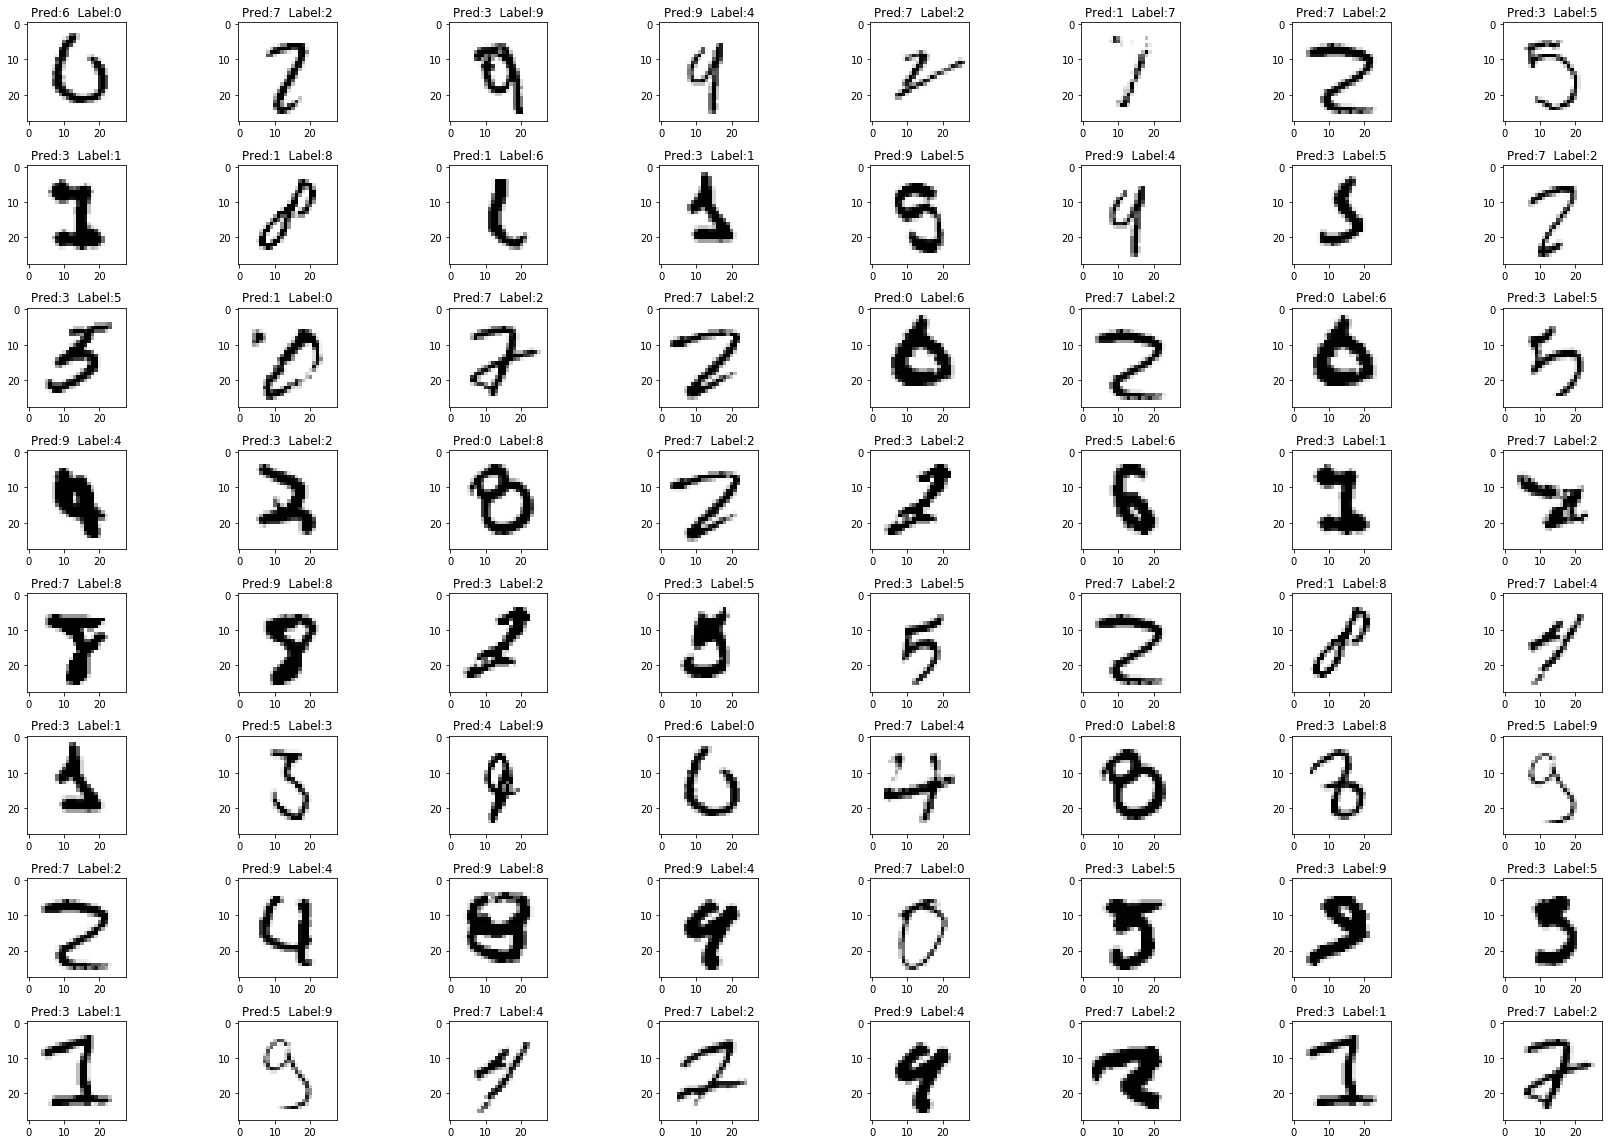

In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt

predicted_result = model.predict(test_images)
predicted_labels = np.argmax(predicted_result, axis=1)

tests_labels = np.argmax(test_labels, axis=1)

wrong_result = []

for n in range(0, len(tests_labels)):
    if predicted_labels[n] != tests_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=64)
# samples = wrong_result

count = 0
nrows = ncols = 8

plt.figure(figsize=(24,16))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(test_images[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Pred:" + str(predicted_labels[n])+"  Label:"+str(tests_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()